# TMDB Data Analysis

# Data Wrangling

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
Tmdb = pd.read_csv('tmdb-movies.csv')

In [4]:
# Display the first few rows
Tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Information about the dataset
Tmdb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# Shape of the dataset
Tmdb.shape

(10866, 21)

In [7]:
# Handle missing values
Tmdb.dropna(inplace=True)

In [9]:
# Convert data types
Tmdb['release_date'] = pd.to_datetime(Tmdb['release_date'])

In [10]:
Tmdb['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10724   2069-12-12
10759   1978-10-25
10760   1978-07-27
10817   1978-05-01
10819   1978-07-28
Name: release_date, Length: 1992, dtype: datetime64[ns]

In [30]:
# Convert budget_adj column from float to integer
Tmdb['budget_adj'] = [int(x) for x in Tmdb['budget_adj']]

In [31]:
# Convert revenue_adj column from float to integer
Tmdb['revenue_adj'] = [int(x) for x in Tmdb['revenue_adj']]

In [32]:
Tmdb['budget_adj']

0        137999939
1        137999939
2        101199955
3        183999919
4        174799923
           ...    
10567            0
10759      1002810
10760      9025291
10817            0
10819            0
Name: budget_adj, Length: 1976, dtype: int64

In [33]:
Tmdb['revenue_adj']

0        1392445892
1         348161292
2         271619025
3        1902723129
4        1385748801
            ...    
10567             0
10759     233989048
10760     471320797
10817       1076189
10819     260730654
Name: revenue_adj, Length: 1976, dtype: int64

In [15]:
# Extract year from 'release_date' and create 'release_year' column
Tmdb['release_year'] = Tmdb['release_date'].dt.year

In [16]:
# Rename column 'imdb_id' to 'tmdb_id'
Tmdb.rename(columns={'imdb_id': 'tmdb_id'}, inplace=True)

In [17]:
Tmdb['tmdb_id']

0        tt0369610
1        tt1392190
2        tt2908446
3        tt2488496
4        tt2820852
           ...    
10724    tt0064757
10759    tt0077651
10760    tt0077975
10817    tt0077838
10819    tt0077696
Name: tmdb_id, Length: 1992, dtype: object

In [18]:
# Check for duplicates
duplicate_rows = Tmdb[Tmdb.duplicated()]
print("Duplicate rows:", duplicate_rows)

Duplicate rows: Empty DataFrame
Columns: [id, tmdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj]
Index: []

[0 rows x 21 columns]


In [19]:
# Drop duplicates
Tmdb.drop_duplicates(inplace=True)

In [20]:
# Check for any unrealistic future years
future_years = Tmdb[Tmdb['release_year'] > pd.Timestamp.now().year]['release_year']
print("Future years:", future_years)

Future years: 7269     2072
9849     2062
9881     2064
9884     2064
9925     2071
9927     2071
9932     2071
9951     2071
10131    2061
10401    2067
10438    2063
10594    2073
10595    2073
10657    2070
10689    2065
10724    2069
Name: release_year, dtype: int32


In [21]:
# Remove unrealistic future years
Tmdb = Tmdb[Tmdb['release_year'] <= pd.Timestamp.now().year]

In [22]:
# Drop 'homepage' column
Tmdb = Tmdb.drop(columns=['homepage'])

## Exploratory Data Analysis (EDA)

### Descriptive Statistics

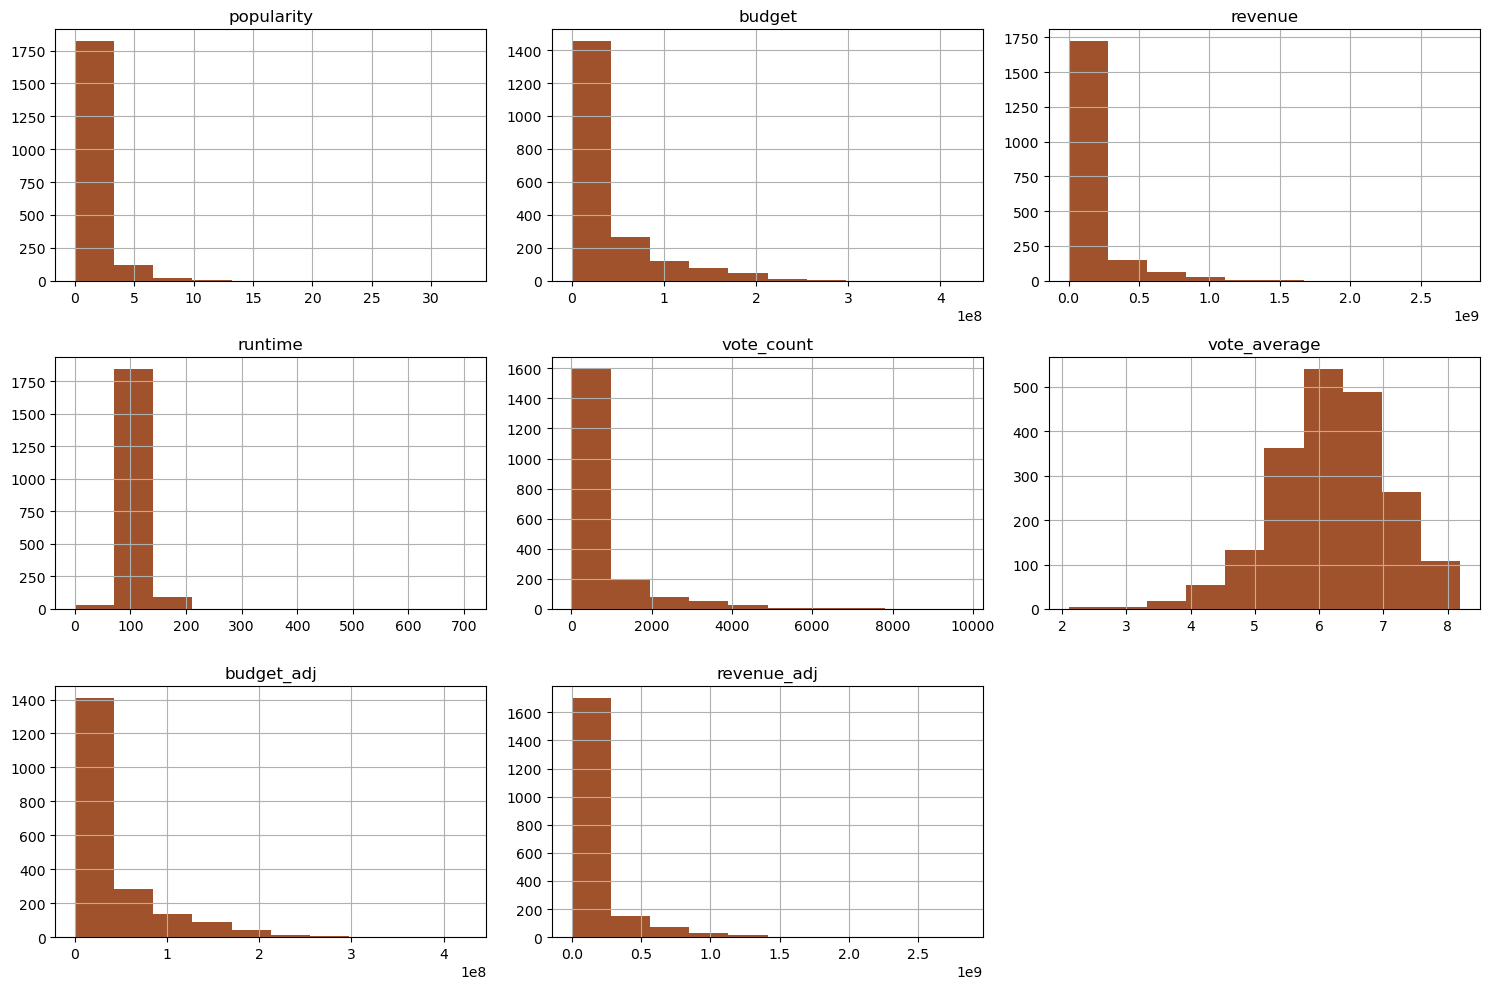

In [79]:
# Plot distributions of numerical variables
numerical_variables = ['popularity', 'budget', 'revenue', 'runtime', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj']; Tmdb[numerical_variables].hist(figsize=(15, 10), color='sienna')
plt.tight_layout()
plt.grid(False)
plt.show()

In [28]:
# Descriptive statistics
Tmdb.describe()

,id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1976.000000,1976.000000,1.976000e+03,1.976000e+03,1976.000000,1976,1976.000000,1976.000000,1976.000000,1.976000e+03,1.976000e+03
mean,72207.865891,1.313001,3.479236e+07,1.153208e+08,105.947368,2008-08-24 11:29:23.562752768,644.362348,6.173988,2008.119433,3.634884e+07,1.265731e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,1974-04-01 00:00:00,10.000000,2.100000,1974.000000,0.000000e+00,0.000000e+00
25%,9836.000000,0.383524,0.000000e+00,0.000000e+00,92.000000,2007-01-16 06:00:00,51.000000,5.600000,2007.000000,0.000000e+00,0.000000e+00
50%,36647.500000,0.769566,1.500000e+07,2.513107e+07,102.000000,2010-02-25 12:00:00,207.000000,6.200000,2010.000000,1.524601e+07,2.724261e+07
75%,84174.250000,1.519517,4.825000e+07,1.278787e+08,115.000000,2012-09-07 00:00:00,690.000000,6.800000,2012.000000,5.082002e+07,1.354520e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,2015-12-26 00:00:00,9767.000000,8.200000,2015.000000,4.250000e+08,2.827124e+09
std,92519.889412,1.876706,5.075001e+07,2.209538e+08,29.279193,NaN,1093.597072,0.882408,6.659297,5.146430e+07,2.491971e+08


In [29]:
Tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1976 entries, 0 to 10819
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1976 non-null   int64         
 1   tmdb_id               1976 non-null   object        
 2   popularity            1976 non-null   float64       
 3   budget                1976 non-null   int64         
 4   revenue               1976 non-null   int64         
 5   original_title        1976 non-null   object        
 6   cast                  1976 non-null   object        
 7   director              1976 non-null   object        
 8   tagline               1976 non-null   object        
 9   keywords              1976 non-null   object        
 10  overview              1976 non-null   object        
 11  runtime               1976 non-null   int64         
 12  genres                1976 non-null   object        
 13  production_companies  

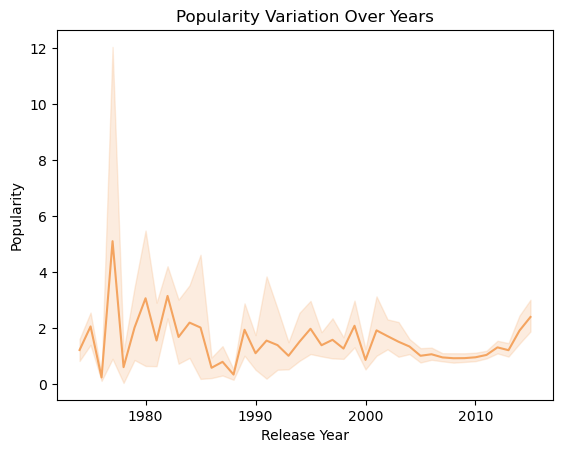

In [111]:
# Explore how popularity varies with release_year
sns.lineplot(x='release_year', y='popularity', data=Tmdb, color='sandybrown')
plt.title('Popularity Variation Over Years')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.savefig('Popularity Variation Over Years.png')
plt.show()

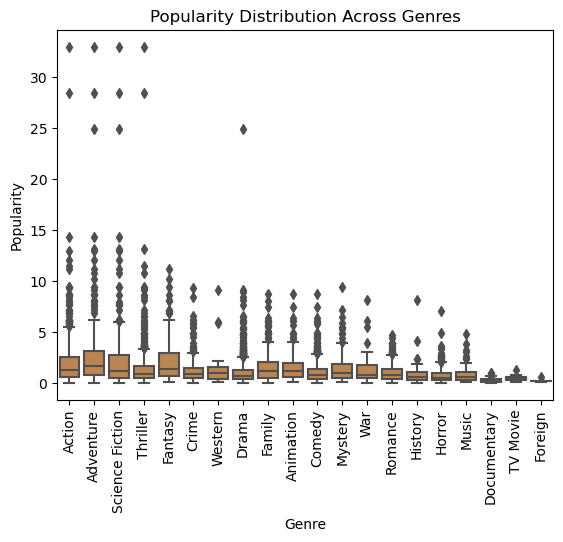

In [112]:
# Explore how popularity varies with genres
genres_data = Tmdb['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
genres_popularity = Tmdb.merge(genres_data, left_index=True, right_index=True)[['popularity', 'genre']]
sns.boxplot(x='genre', y='popularity', data=genres_popularity, color='peru')
plt.title('Popularity Distribution Across Genres')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.savefig('Popularity Distribution Across Genres.png')
plt.show()

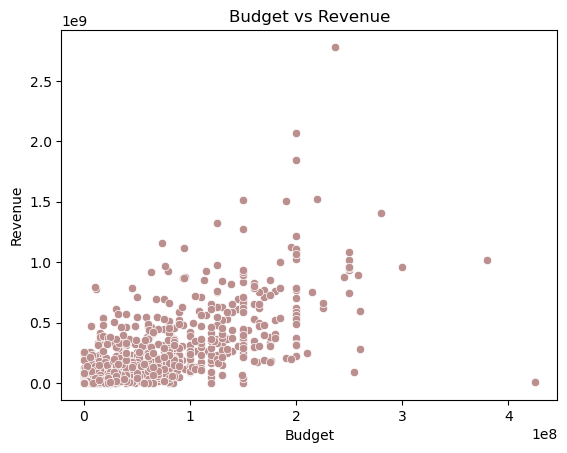

In [113]:
# Investigate the correlation between budget and revenue
sns.scatterplot(x='budget', y='revenue', data=Tmdb, color='rosybrown')
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.savefig('Budget vs Revenue.png')
plt.show()

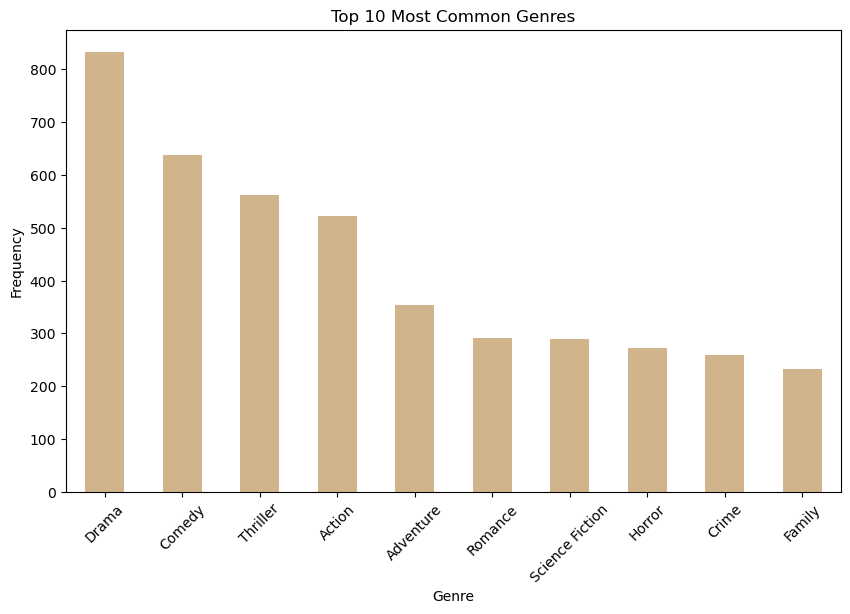

In [114]:
# Analyze the Top 10 most common genres
common_genres = genres_data.value_counts().head(10)
common_genres.plot(kind='bar', figsize=(10, 6), color='tan')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig('Top 10 Most Common Genres.png')
plt.show()

## Trend Analysis

### Popularity Trends

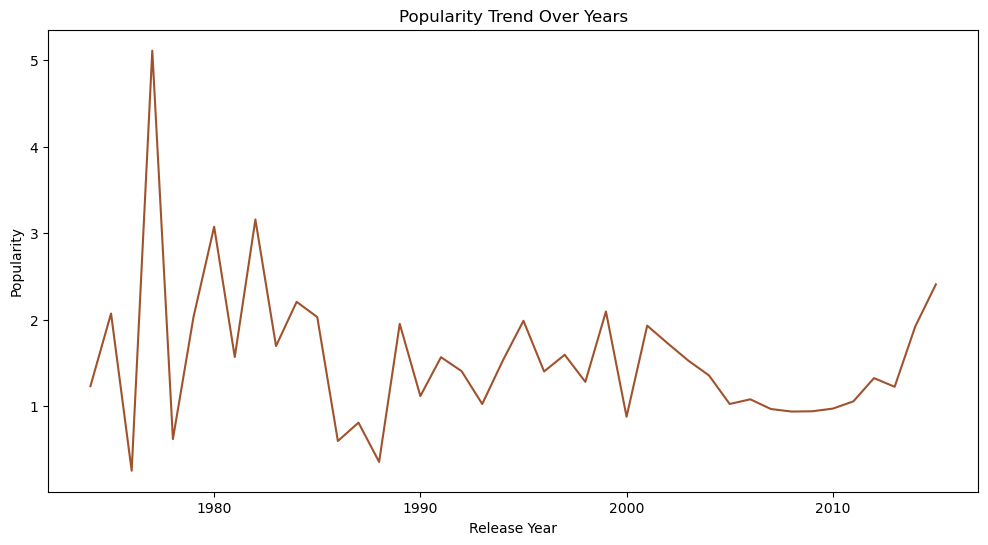

In [115]:
# Trend analysis for popularity over release_year
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='popularity', data=Tmdb, errorbar=None, color='sienna')
plt.title('Popularity Trend Over Years')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.grid(False)
plt.savefig('Popularity Trend Over Years.png')
plt.show()

### Financial Trends

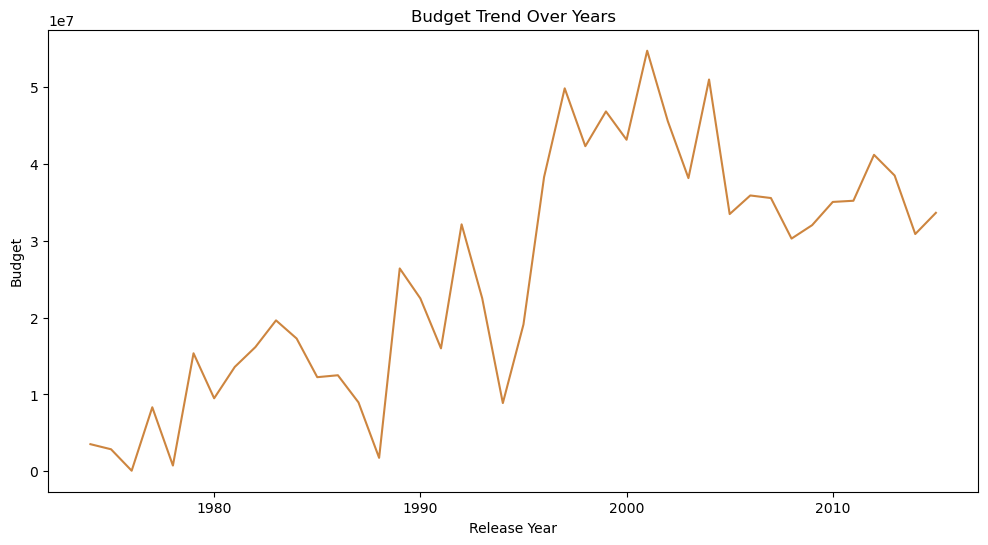

In [116]:
# Trend analysis for budget over release_year
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='budget', data=Tmdb, errorbar=None, color='peru')
plt.title('Budget Trend Over Years')
plt.xlabel('Release Year')
plt.ylabel('Budget')
plt.grid(False)
plt.savefig('Budget Trend Over Years.png')
plt.show()

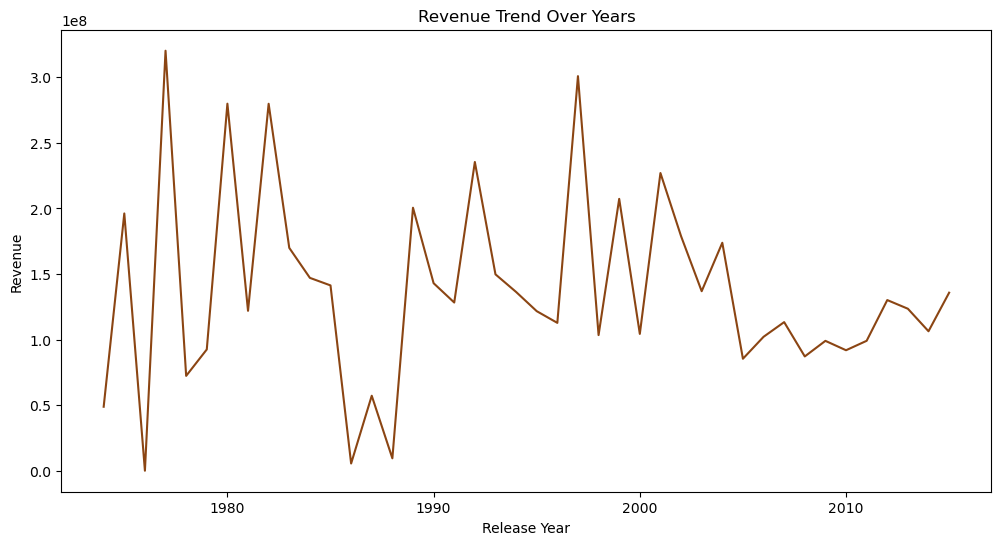

In [117]:
# Trend analysis for revenue over release_year
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='revenue', data=Tmdb, errorbar=None, color='saddlebrown')
plt.title('Revenue Trend Over Years')
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.grid(False)
plt.savefig('Revenue Trend Over Years.png')
plt.show()

## Comparative Analysis

### Budget vs. Revenue

In [47]:
# Calculate profit
Tmdb['profit'] = Tmdb['revenue'] - Tmdb['budget']

In [48]:
# Calculate profit margin (profit as a percentage of revenue)
Tmdb['profit_margin'] = (Tmdb['profit'] / Tmdb['revenue']) * 100

In [81]:
# Descriptive statistics of profit
Tmdb['profit'].describe()

count    1.976000e+03
mean     8.052848e+07
std      1.860268e+08
min     -4.139124e+08
25%      0.000000e+00
50%      5.122820e+06
75%      7.754256e+07
max      2.544506e+09
Name: profit, dtype: float64

### Budget Adjusted for Inflation

In [92]:
# Calculate percentage difference function
def calculate_percentage_difference(row):
    if row['budget'] != 0:
        return ((row['budget_adj'] - row['budget']) / row['budget']) * 100
    else:
        return None


In [93]:
# Apply function to calculate percentage difference
Tmdb['percentage_difference'] = Tmdb.apply(calculate_percentage_difference, axis=1)

In [95]:
Tmdb['percentage_difference'].describe()

count    1431.000000
mean        8.963266
std        33.337663
min      -100.000000
25%        -5.025572
50%         1.278659
75%         8.166915
max       342.228386
Name: percentage_difference, dtype: float64

### Revenue Adjusted for Inflation

In [96]:
# Calculate percentage difference function
def calculate_percentage_difference(row):
    if row['revenue'] != 0:
        return ((row['revenue_adj'] - row['revenue']) / row['revenue']) * 100
    else:
        return None

In [97]:
# Apply function to calculate percentage difference
Tmdb['percentage_difference'] = Tmdb.apply(calculate_percentage_difference, axis=1)

In [100]:
Tmdb['percentage_difference'].describe()

count    1431.000000
mean        9.171204
std        32.968146
min        -8.005961
25%        -5.025572
50%         1.278661
75%         8.166915
max       342.228388
Name: percentage_difference, dtype: float64

### NOTE

- **Ie8** and **Ie9** are scientific notation values
- **Ie8** represents millions (10^8)
- **Ie9** represents billions (10^9)